<a href="https://colab.research.google.com/github/nprzrosas/atp_induced_calcium_oscillations_wang_2007/blob/main/atp_calcium_oscillations_wang_2007.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This code is an implementation of the paper title "A quantitative kinetic model for ATP-induced intracellular Ca2+ oscillations.
Wang J, Huang X, Huang W. J. Theor. Biol. 2007 Apr; 245(3): 510-519" using COPASI from Python.
* [Pubmed link](https://pubmed.ncbi.nlm.nih.gov/17188305/)
* [Biomodels Datase](https://www.ebi.ac.uk/biomodels/BIOMD0000000145)



By Norma Perez

In [1]:
!pip install -q copasi-basico

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 11.4 MB/s eta 0:00:00


In [3]:
from basico import *

In [9]:
model = load_biomodel(145)

In [10]:
get_reactions()

,scheme,flux,particle_flux,function,key,sbml_id,mapping
name,,,,,,,
R1,-> Galpha_GTP,1.000000e-01,6.022141e+13,Constant flux (irreversible),Reaction_11,R1,{'v': 'k0'}
R2,-> Galpha_GTP,3.400000e+00,2.047528e+15,Function for R2,Reaction_12,R2,"{'Galpha_GTP': 'Galpha_GTP', 'k1': 'k1'}"
R3,Galpha_GTP ->,2.769231e+00,1.667670e+15,Function for R3,Reaction_13,R3,"{'Galpha_GTP': 'Galpha_GTP', 'Raplc': 'Raplc',..."
R4,Galpha_GTP ->,2.045455e-01,1.231802e+14,Function for R4,Reaction_14,R4,"{'Galpha_GTP': 'Galpha_GTP', 'Rpkc': 'Rpkc', '..."
R5,-> APLC; PLC,3.041576e-08,1.831680e+07,Function for R5,Reaction_15,R5,"{'PLC': 'PLC', 'Rdg': 'Rdg', 'Rgalpha_gtp': 'R..."
R6,APLC ->,1.080000e+00,6.503912e+14,Mass action (irreversible),Reaction_16,R6,"{'k1': 'k5', 'substrate': 'APLC'}"
R7,-> IP3; APLC,1.260000e+02,7.587897e+16,Function for R7,Reaction_17,R7,"{'APLC': 'APLC', 'k6': 'k6'}"
R8,IP3 ->,2.000000e+00,1.204428e+15,Mass action (irreversible),Reaction_18,R8,"{'k1': 'k7', 'substrate': 'IP3'}"
R9,0.001 * Calcium{ER} = 0.01 * Calcium{Cytosol},-9.932833e+01,-5.981692e+16,Function for R9,Reaction_19,R9,"{'ER': 'ER', 'Rcyt1': 'Rcyt1', 'Rer': 'Rer', '..."


In [11]:
get_species()

,compartment,type,unit,initial_concentration,initial_particle_number,initial_expression,expression,concentration,particle_number,rate,particle_number_rate,key,sbml_id
name,,,,,,,,,,,,,
Galpha_GTP,Cytosol,reactions,nmol/l,1.0,6.022141e+14,,,1.0,6.022141e+14,0.526224,3.168994e+14,Metabolite_7,Galpha_GTP
APLC,Cytosol,reactions,nmol/l,9.0,5.419927e+15,,,9.0,5.419927e+15,-1.080000,-6.503912e+14,Metabolite_8,APLC
IP3,Cytosol,reactions,nmol/l,1.0,6.022141e+14,,,1.0,6.022141e+14,124.000000,7.467455e+16,Metabolite_9,IP3
Calcium,ER,reactions,nmol/l,1000.0,6.022141e+17,,,1000.0,6.022141e+17,0.099328,5.981692e+13,Metabolite_10,Ca_ER
Calcium,Cytosol,reactions,nmol/l,200.0,1.204428e+17,,,200.0,1.204428e+17,-1.629647,-9.813963e+14,Metabolite_11,Ca_Cyt
PLC,Cytosol,assignment,nmol/l,1.0,6.022141e+14,,Values[Cplc_total] - [APLC],1.0,6.022141e+14,NaN,NaN,Metabolite_12,PLC
Diacylglycerol,Cytosol,assignment,nmol/l,1.0,6.022141e+14,,[IP3],1.0,6.022141e+14,NaN,NaN,Metabolite_13,DG


In [12]:
get_species()[['initial_concentration']]

,initial_concentration
name,
Galpha_GTP,1.0
APLC,9.0
IP3,1.0
Calcium,1000.0
Calcium,200.0
PLC,1.0
Diacylglycerol,1.0


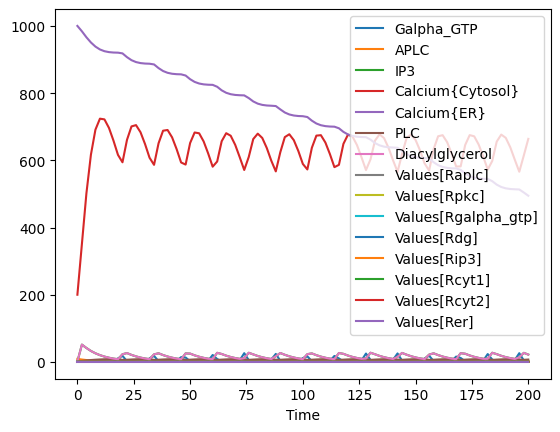

In [13]:
tc = run_time_course(model = model, duration = 200)
tc.plot();